In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, LSTM, Dropout, Dense, Flatten, Embedding, Conv1D, Input
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, classification_report, auc, roc_curve, accuracy_score

In [2]:
from keras.datasets import mnist
import numpy as np
(train_images, _), (test_images, _) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

11493376/11490434 [==============================] - 3s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [6]:
def autoencoder_model(encoding_dim):
    input_layer = Input(shape=(784,))
    encoder_layer = Dense(encoding_dim, activation='relu')(input_layer)
    
    decoder_layer1 = Dense(784, activation='sigmoid')(encoder_layer)
    autoencoder = Model(inputs=input_layer, outputs=decoder_layer1)

    encoder = Model(inputs=input_layer, outputs=encoder_layer)
    encoded_input = Input(shape=(encoding_dim,))
    decoder_layer = autoencoder.layers[-1]
    
    decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
    return autoencoder, encoder, decoder

encoding_dim = 32
model, encoder, decoder = autoencoder_model(encoding_dim)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adadelta', loss='binary_crossentropy')

In [8]:
epochs = 60
batch_size = 256
history = model.fit(train_images, train_images, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    shuffle=True,
                    validation_data=(test_images, test_images))
# score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/60
235/235 [==============================] - 2s 5ms/step - loss: 0.6940 - val_loss: 0.6938
Epoch 2/60
235/235 [==============================] - 1s 4ms/step - loss: 0.6938 - val_loss: 0.6936
Epoch 3/60
235/235 [==============================] - 1s 4ms/step - loss: 0.6935 - val_loss: 0.6934
Epoch 4/60
235/235 [==============================] - 1s 4ms/step - loss: 0.6933 - val_loss: 0.6931
Epoch 5/60
235/235 [==============================] - 1s 6ms/step - loss: 0.6931 - val_loss: 0.6929
Epoch 6/60
235/235 [==============================] - 1s 4ms/step - loss: 0.6929 - val_loss: 0.6927
Epoch 7/60
235/235 [==============================] - 1s 4ms/step - loss: 0.6927 - val_loss: 0.6925
Epoch 8/60
235/235 [==============================] - 1s 4ms/step - loss: 0.6924 - val_loss: 0.6922
Epoch 9/60
235/235 [==============================] - 1s 4ms/step - loss: 0.6922 - val_loss: 0.6920
Epoch 10/60
235/235 [==============================] - 1s 4ms/step - loss: 0.6920 - val_loss: 0.6918

In [10]:
encoded_imgs = encoder.predict(test_images)
decoded_imgs = decoder.predict(encoded_imgs)

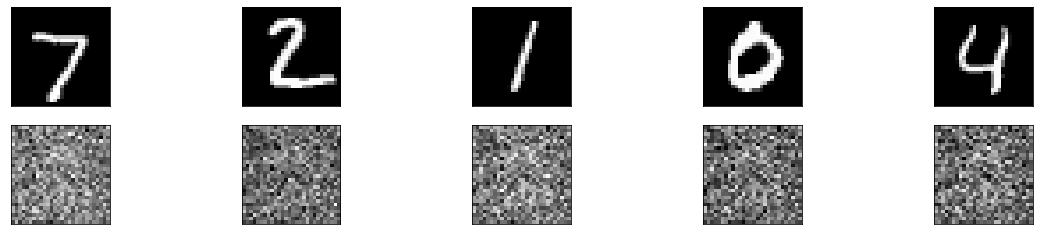

In [13]:
import matplotlib.pyplot as plt
n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(test_images[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()